In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("gt_2012.csv", sep=",")
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [3]:
df.shape

(7628, 11)

In [4]:
df.describe()

AT           AP           AH         AFDP         GTEP  \
count  7628.000000  7628.000000  7628.000000  7628.000000  7628.000000   
mean     18.397950  1012.258153    79.074804     4.306717    25.181361   
std       7.661038     6.384291    14.105087     0.831170     4.006825   
min       0.522300   985.850000    30.344000     2.087400    18.100000   
25%      12.269250  1008.400000    69.165250     3.882650    23.090750   
50%      19.120500  1012.000000    82.411500     4.298050    25.221000   
75%      24.337250  1016.000000    90.356250     4.670525    26.322250   
max      34.929000  1031.800000   100.200000     7.610600    37.402000   

               TIT          TAT          TEY          CDP           CO  \
count  7628.000000  7628.000000  7628.000000  7628.000000  7628.000000   
mean   1082.890233   546.263793   132.675552    12.000121     2.361133   
std      16.852148     7.331345    15.302140     1.049384     2.474116   
min    1024.600000   513.060000   101.150000     9.928600     0.007505   
25%    1075.800000   547.657500   125.240000    11.469750     1.127125   
50%    1089.100000   549.920000   133.760000    12.041000     1.636300   
75%    1093.800000   550.070000   134.900000    12.290000     2.953025   
max    1100.800000   550.530000   174.610000    15.081000    44.103000   

               NOX  
count  7628.000000  
mean     68.788965  
std      10.224937  
min      41.777000  
25%      62.531250  
50%      67.246500  
75%      73.424500  
max     119.890000

In [ ]:
sns.pairplot(df)

In [6]:
X = df.copy()
kmeans = KMeans(n_clusters = 2, random_state = 1000).fit(X)

In [7]:
X['k_labels'] = kmeans.labels_

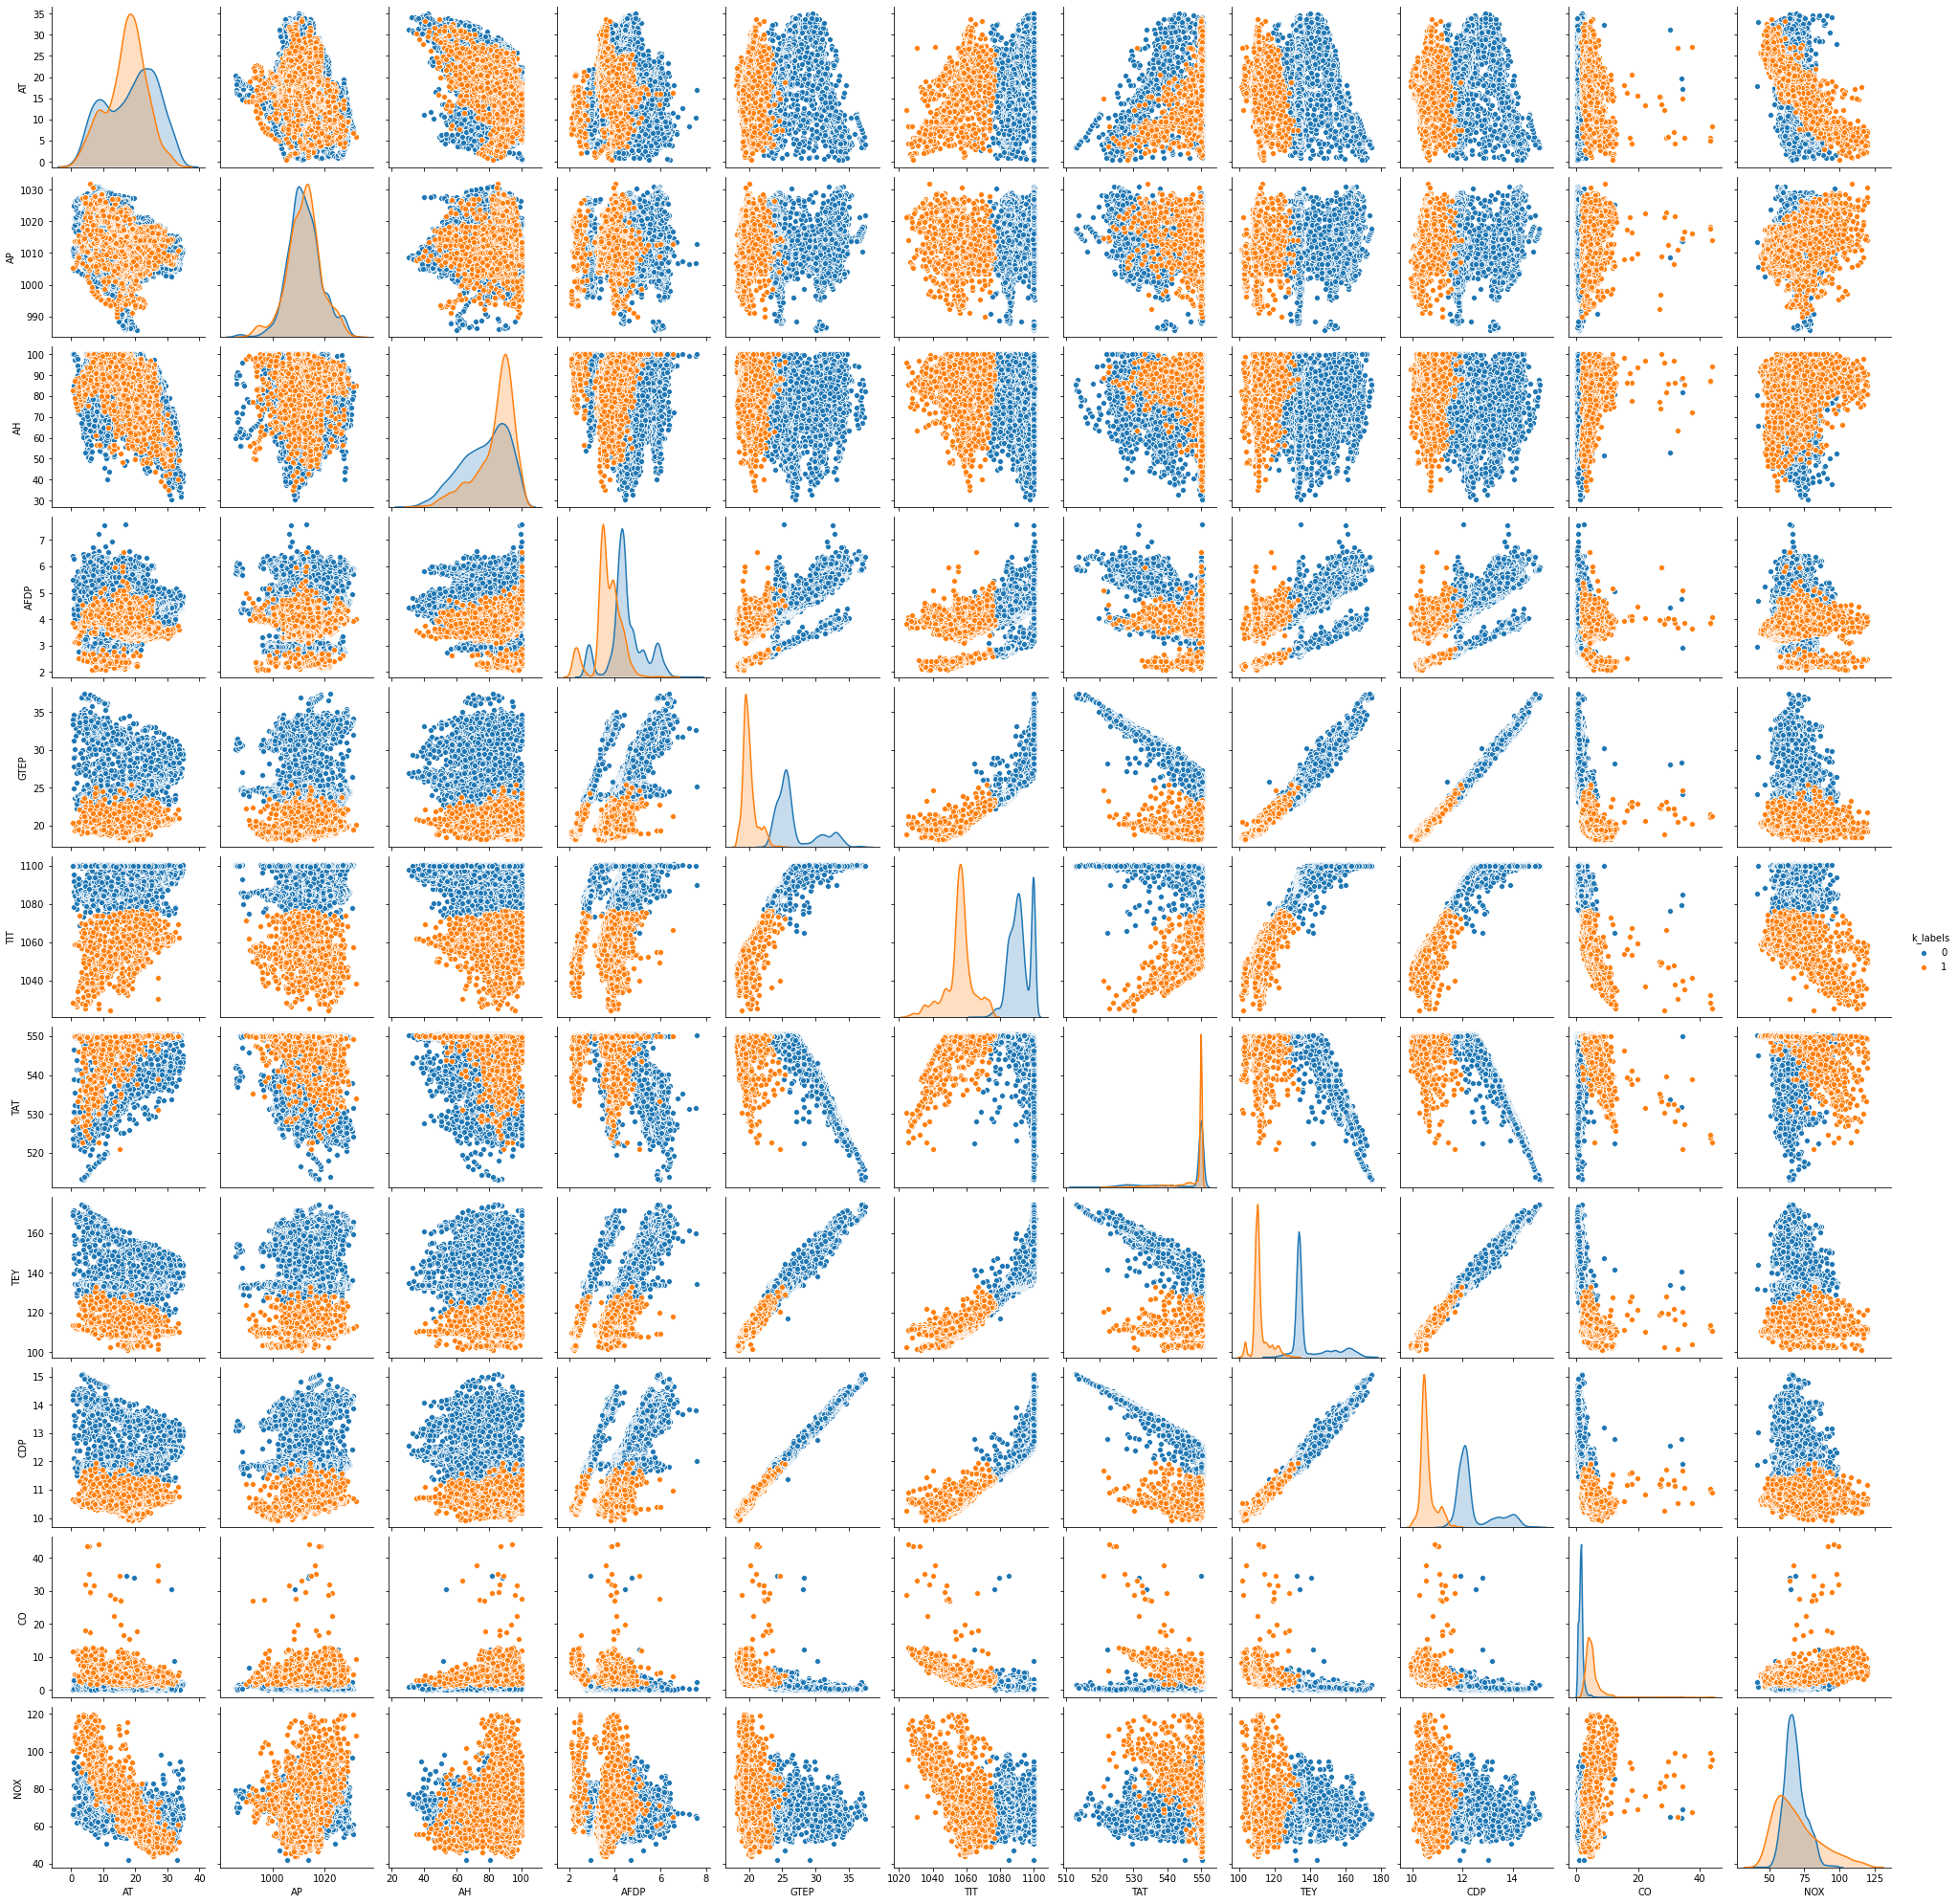

In [8]:
sns.pairplot(X, hue='k_labels')

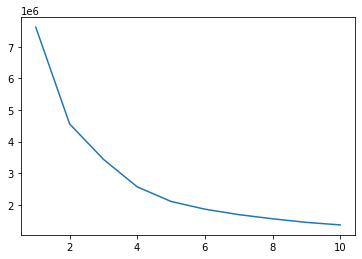

In [9]:
Y = df.copy()

n = range(1, 11)
avg_inr_lst = []
for k in n:
    sub_inr_lst = []
    for i in range(0, 5):
        kmeans = KMeans(n_clusters = k).fit(Y)
        sub_inr_lst.append(kmeans.inertia_)
    avg_inr_lst.append(np.average(sub_inr_lst))
plt.plot(n, avg_inr_lst)
plt.show()

Based on the smoothness of the elbow plot, this dataset is either not clusterable or kmeans can't detect it's underlying clustering structure.

In [12]:
test = pd.DataFrame({'days': [0,20,30,31,45,60]})

test['range1'] = pd.cut(test.days, [0,30,60], include_lowest=True)
#30 value is in [30, 60) group
test['range2'] = pd.cut(test.days, [0,30,60], right=False)
#30 value is in (0, 30] group
test['range3'] = pd.cut(test.days, [0,30,60])
print (test)

In [18]:
df['CO_range'] = pd.cut(df['CO'], [0, 1.127125, 1.636300, 2.953025, 45], include_lowest=True)

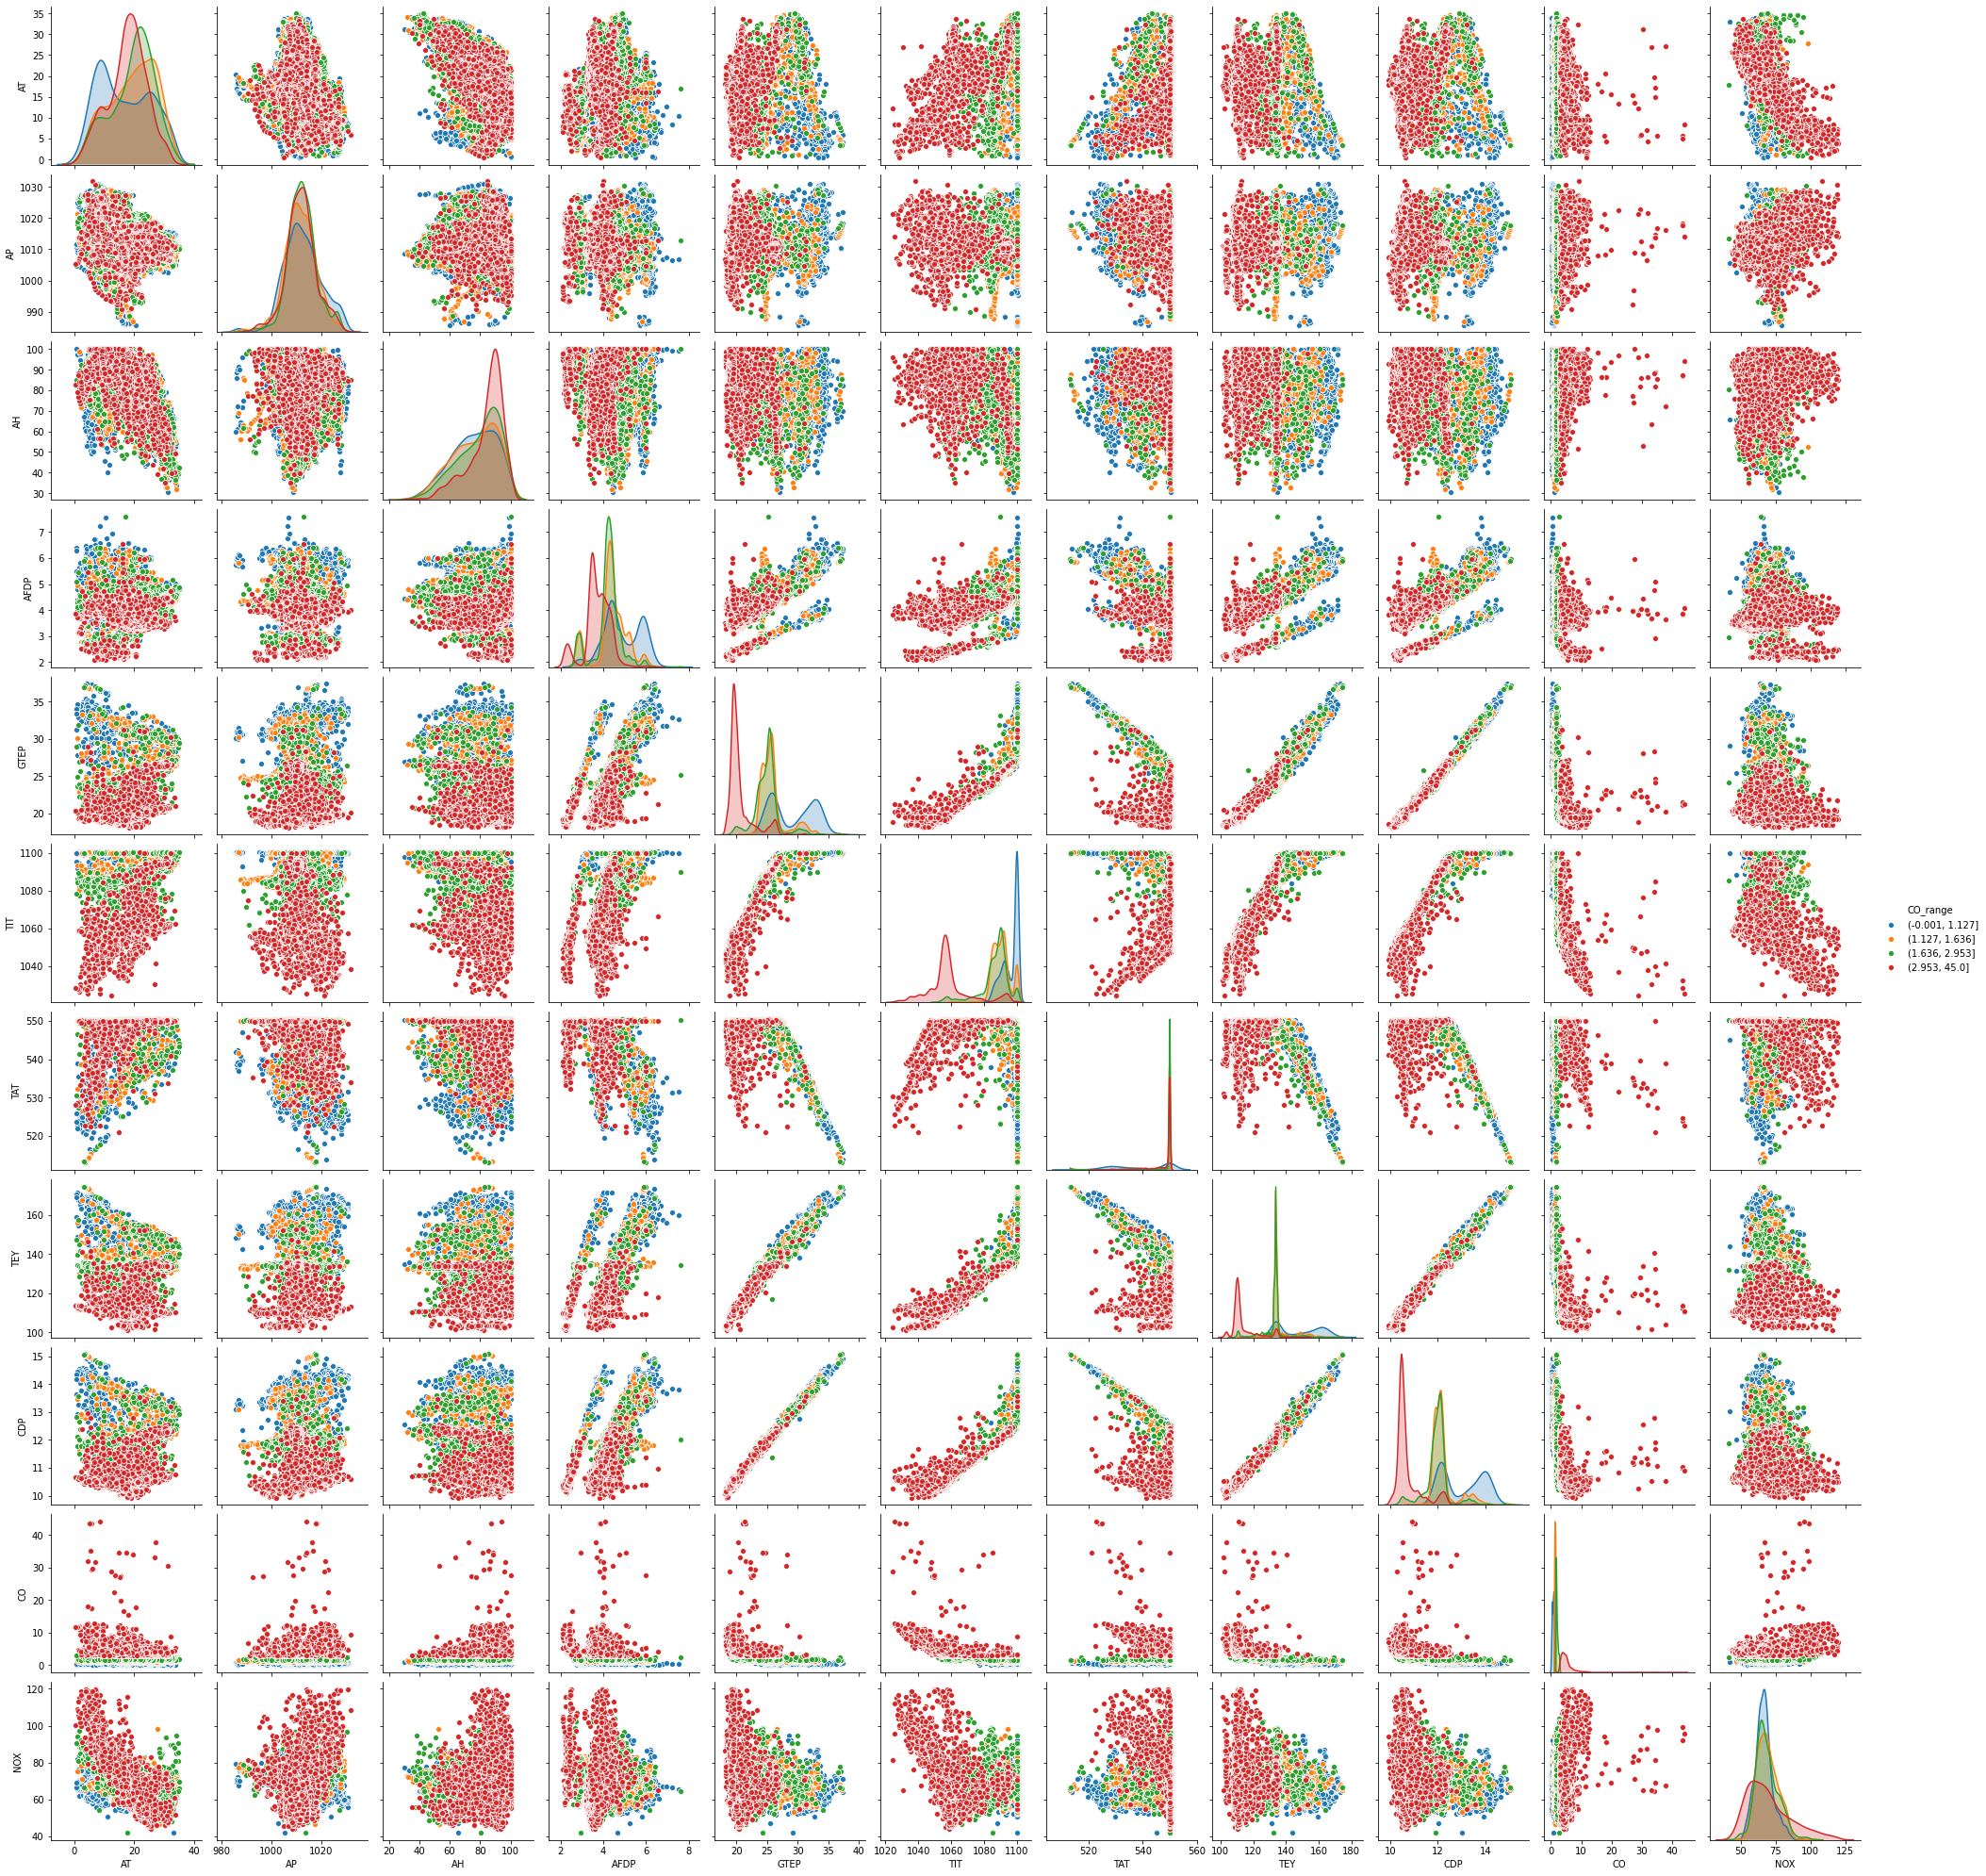

In [19]:
sns.pairplot(df, hue='CO_range')